In [58]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
#Loading dataset
df = pd.read_csv("/content/drive/MyDrive/ML Projects/Admission_Predict.csv")

In [60]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [61]:
#shape of data
df.shape

(400, 9)

In [62]:
#Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [63]:
#Descriptive statistics of dataset
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [64]:
#Checking missing values in dataset
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#### We can see that, there is no missing values in dataset.

In [65]:
#Let's see that columns of dataset
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

Text(0.5, 1.0, 'Relation between GRE Score and Admission Chances')

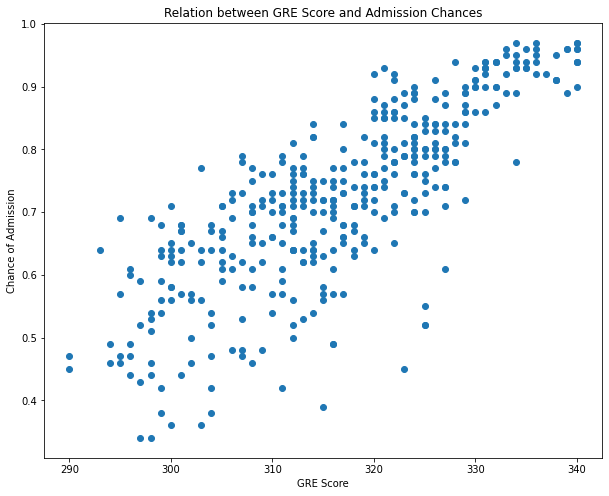

In [66]:
### Data Visualization

#Let's see the relationship between GRE Score and Chance of Admission
plt.figure(figsize = (10, 8))
plt.scatter(df['GRE Score'], df['Chance of Admit '])
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admission")
plt.title("Relation between GRE Score and Admission Chances")

Text(0.5, 1.0, 'Relation between TOEFL Score and Admission Chances')

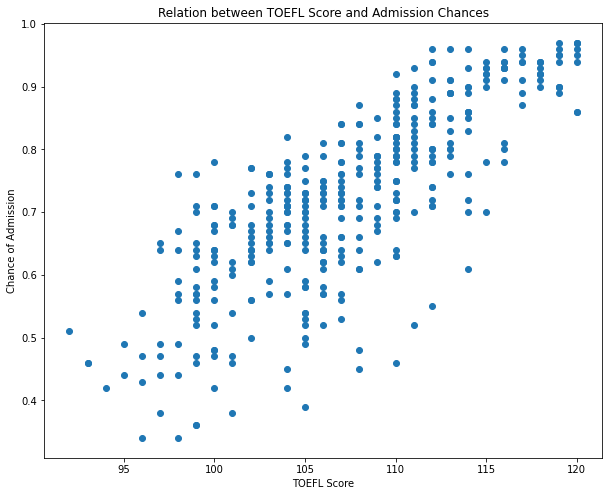

In [67]:
#Let's see the graph between TOEFL Score and Chance of admit
plt.figure(figsize = (10, 8))
plt.scatter(df['TOEFL Score'], df['Chance of Admit '])
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admission")
plt.title("Relation between TOEFL Score and Admission Chances")

Text(0.5, 1.0, 'Relation between CGPA and Admission Chances')

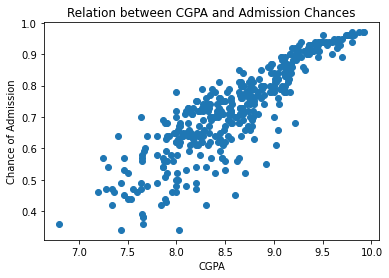

In [68]:
#Let's see that graph between the  CGPA and Chance of admit
plt.scatter(df['CGPA'], df['Chance of Admit '])
plt.xlabel("CGPA")
plt.ylabel("Chance of Admission")
plt.title("Relation between CGPA and Admission Chances")

#### From the above graph between continuous variable and target variable,
#### it can be concluded that they exhibit linear relationship between them.
#### So we will use linear regression for prediction.


In [69]:
#We drop seiral no column which is no of use
df.drop('Serial No.', axis = 1, inplace = True)

In [70]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [71]:
#Now we split dataset into independent variable and dependent variable
X = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

In [72]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [73]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [74]:
#Now splitting dataset into training data and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state= 100)

In [75]:
x_train.shape, x_test.shape

((268, 7), (132, 7))

In [76]:
y_train.shape, y_test.shape

((268,), (132,))

In [77]:
#Scaling dataset
#from sklearn.preprocessing import StandardScaler 

In [78]:
#scaler = StandardScaler()

In [79]:
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)

In [80]:
#x_train

In [81]:
## Now we creae linear regression model
from sklearn.linear_model import LinearRegression

In [82]:
regressor = LinearRegression()

In [83]:
#Train the model
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
#Predict the model
y_predict = regressor.predict(x_test)

In [85]:
#Now we check the accuracy of the model
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
mse = mean_squared_error(y_predict, y_test)
rmse = np.sqrt(mean_squared_error(y_predict, y_test))
scores = r2_score(y_predict, y_test)

In [87]:
print("MSE : ", mse)
print("RMSE : ", rmse)
print("R squared score: ", scores)

MSE :  0.003774587157359262
RMSE :  0.06143766887959912
R squared score:  0.7727846883591629


In [94]:
#Now saving the model to the local file system
import pickle
filename = "admission_model.pkl"
pickle.dump(regressor, open(filename, 'wb'))

In [95]:
#Now we load the model and predict the new data
loaded_model = pickle.load(open(filename, 'rb'))

In [96]:
#Let's predict on new dataset
pred = loaded_model.predict([[320, 120, 5,5,5,10, 1]])
pred[0]

0.997411918221816

#### With the given input, our model predicts that the chance of admission is 99.74 percent.